In [3]:
import mesh.parser as mp
import numpy as np
from mesh.npmesh import NPMesh

import scipy.sparse as sps
import scipy.sparse.linalg as splinalg
import scipy.optimize as opt

import matplotlib.pyplot as plt 

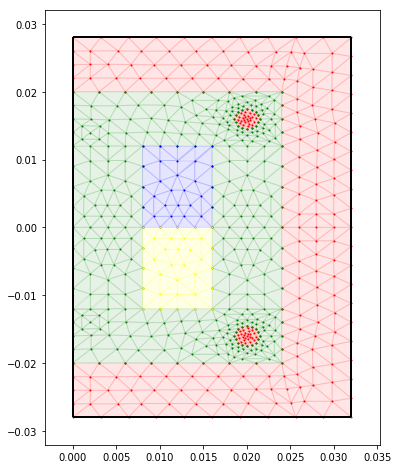

In [13]:
with open('../npyfem/resources/transformer3.msh') as fileh:
    nelems = mp.parse_mesh(fileh)
msh = NPMesh(*nelems)

fig = plt.figure(figsize=(6,8))
ax = plt.gca()

specs = {
    # Air
    1000: {'color':'red'},
    # core
    1001: {'color': 'green'},
    # primary coil
    1002: {'color': 'blue'},
    # secondary coil
    1003: {'color': 'yellow'},
    #dirichlet boundary
    2000: {'color': 'black'}
}

msh.draw_mesh(ax, specs)
plt.show()

In [ ]:
mu0 = np.pi*4e-7
mur = 1000

N1 = 100
N2 = 100

i1 = 5
i2 = 20

In [ ]:
air = msh.get_elements(2, 1000)[0]
core = msh.get_elements(2, 1001)[0]
coil1 = msh.get_elements(2, 1002)[0]
coil2 = msh.get_elements(2, 1003)[0]
dirbound = msh.get_elements(1, 2000)[0]

In [ ]:

# let's forget about z-axis for a while
J = tri.get_jacobians_isop(columns=[0,1])
detJ = tri.get_detj_isop(columns=[0,1])
N = tri.form0_ref(tri.intpoints)
dN = tri.dform0_ref(tri.intpoints)

# get the basis function derivatives in xy coordinates
dNxy = np.linalg.solve(J, dN)

ints = tri.integrate_ref(k*innprod(dNxy,dNxy)*detJ)

F = tri.assemble_gnode(tri.integrate_ref(100*N*detJ)).T.tolil()

K = tri.assemble_gnode(ints).tolil()

# apply boundary conditions with style 1
ndofs = north.global_nodeids
sdofs = south.global_nodeids

# create a full vector with zeros in Fr nodes and
# Dir values in Dir nodes
bound = sps.lil_matrix(F.shape)
bound[ndofs] = T1
bound[sdofs] = T2

# create the Kij*xj term for j in Dir
Q = K*bound

# decouple the Dirichlet nodes from the system
# i.e. reduce the "solvee" to Fr x Fr,
K[ndofs,:] = 0
K[:,ndofs] = 0
K[ndofs,ndofs] = 1
K[sdofs,:] = 0
K[:,sdofs] = 0
K[sdofs,sdofs] = 1

# source vector
b =  F - Q
# place the dirichlet values to dir nodes
b[ndofs] = T1
b[sdofs] = T2

# solve
T = sps.linalg.spsolve(K.tocsr(),b)
